<h1>
    <br style ="font-family:UCL-SoM-Outline;color:#EA7600"> GROUP COURSEWORK </br> 
    </p>
</h1>

<div class="image">

<img src="./figures/som_ft.png" width="70%"  align="right">
<h4>
          <p style="font-size:18pt">MSIN0097 Predictive Analytics</p>
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#EA7600;">Group Name: <u>21178499, 21170965, 21179343</u> </p> 
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#EA7600;">Emails: <u>**EDIT**</u> </p> 

</h4>

</div>

<br>
<br>
<br>


# COURSEWORK: WARNER MUSIC



### PREDICTING THE SUCCESS OF ARTISTS ON SPOTIFY

Please complete the sections of this Notebook with supporting code and markup analysis where appropriate. During this coursework you will:

- Understand the specific business forecast task 
- Prepare a dataset, clean and impute where necessary 
- Train an ensemble classifier 
- Evaluate the performance and comment of success and failure modes
- Complete all necessary stages of the data science process 




There should be around 100 words per ACTION cell, but use the wordcount over the duration of the Notebook at your discretion. 

* **Please use the below green cell, when writing your comments in markup.**
* **Please feel free to add extra code cells in the notebook if needed.**

<div class="alert alert-success">
<b> Title </b> (Optional)

<p>Content</p> 

</div>

## 0. Business Case Understanding

### INTRODUCTION

Over the last few years, the music industry has been dominated by digital streaming services, which produce vast amounts of data on listeners and their preferences. 

This has required major players in the industry to adopt a data driven approach to content delivery in order to stay competitive. 

Warner Music Group is looking to leverage its rich database to better understand the factors that have the most significant impact on the success of a new artist. This will allow them to optimize the allocation of resources when signing and promoting new artists.

Warner’s (large) database contains several sources of data, including the streaming platforms Spotify, Amazon Live and Apple Music. 

For this case study, we will be looking using the Spotify dataset to predict the success of artists. In particular, we want to understand the role of Spotify playlists on the performance of artist.

### Streaming Music

When artists release music digitally, details of how their music is streamed can be closely monitored. 

Some of these details include:

- How listeners found their music (a recommendation, a playlist)
- Where and when (a routine visit to the gym, a party, while working). 
- On what device (mobile / PC)
- And so on…

Spotify alone *process nearly 1 billion streams every day* (Dredge, 2015) and this streaming data is documented in detail every time a user accesses the platform. 

Analyzing this data potentially enables us to gain a much deeper insight into customers’ listening behavior and individual tastes. 

Spotify uses it to drive their recommender systems – these tailor and individualize content as well as helping the artists reach wider and more relevant audiences. 

Warner Music would like to use it to better understand the factors that influence the *future success of its artists*, *identify potentially successful acts* early on in their careers and use this analysis to make resource decisions about how they market and support their artists.

### What are Spotify Playlists and why are relevant today?

A playlist is a group of tracks that you can save under a name, listen to, and update at your leisure. 


<img src = 'figures/spotify_playlist_image.png' width="50%"  align="left">

**Figure 1. Screen shot of Spotify product show artists and playlists.**

Spotify currently has more than two billion publicly available playlists, many of which are curated by Spotify’s in-house team of editors. 

The editors scour the web on a daily basis to remain up-to-date with the newest releases, and to create playlists geared towards different desires and needs. 

Additionally, there are playlists such as [Discover Weekly](https://www.spotify.com/uk/discoverweekly/) and [Release Radar](https://support.spotify.com/uk/using_spotify/playlists/release-radar/) that use self-learning algorithms to study a user’s listening behavior over time and recommend songs tailored to his/her tastes.
	
The figure below illustrates the progression of artists on Spotify Playlists:

<img src = 'figures/playlist_heirarchy.png' width="80%"  align="left">

**Figure 2. Figure to illustarte selecting artists and building audience profiles over progressively larger audiences of different playlists. **

The artist pool starts off very dense at the bottom, as new artists are picked up on the smaller playlists, and thins on the way to the top, as only the most promising of them make it through to more selective playlists. The playlists on the very top contain the most successful, chart-topping artists.

An important discovery that has been made is that certain playlists have more of an influence on the popularity, stream count and future success of an artist than others. 

<img src = 'figures/playlist_lift.png' width="80%"  align="left">

** Figure 3. Figure to illustrate taking song stream data and using it to predict the trajectory, and likely success, of Warner artists. **

Moreover, some playlists have been seen to be pivotal in the careers of successful artists. Artists that do make it onto one of these *key* playlists frequently go on to become highly ranked in the music charts. 

It is the objective of Warner’s [A&R](https://en.wikipedia.org/wiki/Artists_and_repertoire) team to identify and sign artists before they achieve this level of success i.e. before they get selected for these playlists, in order to increase their ROI. 

### BUSINESS PROBLEM → DATA PROBLEM

Now that we have a better understanding of the business problem, we can begin to think about how we could model this problem using data. 

The first thing we can do is defining a criterion for measuring artist success. 

Based on our business problem, one way in which we can do this is to create a binary variable representing the success / failure of an artist and determined by whether a song ends up on a key playlist (1), or not (0). We can then generate features for that artist to determine the impact they have on the success of an artist.

Our problem thus becomes a classification task, which can be modeled as follows:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*

where,

**Success (1) = Artist Features on Key Playlist**

The key playlists we will use for this case study are the 4 listed below, as recommended by Warner Analysts:

1.	Hot Hits UK
2.	Massive Dance Hits
3.	The Indie List
4.	New Music Friday


The coursework task is to take a look at the Spotify dataset to see how we might be able to set up this classification model.

Complete the code sections below to work through the project from start to finish. 
<br>

<div class="alert alert-warning">
<b>ACTION: Guidance </b> 

<p>If you need to do something, instructions will appear in a box like this</p> 

</div>

## 1. Prepare the problem 

Run your code on Faculty. We have prepared some of the data for you already. 

In addition, we have imported a custom module (spotfunc.py) containing useful functions written for this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



## 2. Data Understanding

<br>
A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).

For the purposes of this case study, we will be using a sample of this data. The dataset uploaded on the Faculty server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, we will be taking a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'. 

*Note: The code for this sampling in included below, but commented out.*

We can begin with reading in the datasets we will need. We will be using 2 files: 
1. Primary Spotify dataset
2. Playlist Name Mapper (only playlist IDs provided in primary dataset)



Read in the data

In [ ]:
%%time
# Read in sampled data
data = pd.read_csv('cleaned_data.csv')
print('rows:',len(data))

# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])

Begin by taking a look at what the Spotify data looks like:

<div class="alert alert-warning">
<b>ACTION: Inspect the data </b> 

Make sure you understand the data. Use methods like **data.head()**, **data.info()**, etc.

</div>

In [3]:
# show first 5 rows
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [4]:
# get a basic insight of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805499 entries, 0 to 3805498
Data columns (total 45 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Unnamed: 0.1.1     object 
 3   day                int64  
 4   log_time           object 
 5   mobile             bool   
 6   track_id           object 
 7   isrc               object 
 8   upc                float64
 9   artist_name        object 
 10  track_name         object 
 11  album_name         object 
 12  customer_id        object 
 13  postal_code        object 
 14  access             object 
 15  country_code       object 
 16  gender             object 
 17  birth_year         float64
 18  filename           object 
 19  region_code        object 
 20  referral_code      float64
 21  partner_name       object 
 22  financial_product  object 
 23  user_product_type  object 
 24  offline_timestamp  float64
 25  stream_length     

In [5]:
# obtain columns to focus on
df = data.loc[:,("log_time", "artist_name", "track_name", "isrc", "customer_id",
                "birth_year", "postal_code", "gender", "stream_source_uri",
                "weekday_name", "region_code", "playlist_name")]

In [6]:
# show first 5 rows
df.head()

,log_time,artist_name,track_name,isrc,customer_id,birth_year,postal_code,gender,stream_source_uri,weekday_name,region_code,playlist_name
0,20160510T12:15:00,Sturgill Simpson,Call To Arms,USAT21600547,6c022a8376c10aae37abb839eb7625fe,1968.0,NE,male,NaN,Tuesday,GB-DUR,NaN
1,20160510T12:15:00,Sturgill Simpson,Call To Arms,USAT21600547,6c022a8376c10aae37abb839eb7625fe,1968.0,NE,male,NaN,Tuesday,GB-DUR,NaN
2,20160510T14:00:00,Sturgill Simpson,Call To Arms,USAT21600547,352292382ff3ee0cfd3b73b94ea0ff8f,1995.0,1,male,NaN,Tuesday,GB-ESS,NaN
3,20160510T10:45:00,Sturgill Simpson,Call To Arms,USAT21600547,c3f2b54e76696ed491d9d8f964c97774,1992.0,MK,male,NaN,Tuesday,GB-HRT,NaN
4,20160510T10:15:00,Sturgill Simpson,Call To Arms,USAT21600547,6a06a9bbe042c73e8f1a3596ec321636,1979.0,KT,male,NaN,Tuesday,GB-LND,NaN


Each row in the data is a unique stream – every time a user streams a song in the Warner Music catalogue for at least 30 seconds it becomes a row in the database. Each stream counts as a ‘transaction’, the value of which is £0.0012, and accordingly, 1000 streams of a song count as a ‘sale’ (worth £1) for the artist. The dataset is comprised of listeners in Great Britain only.

Not all the columns provided are relevant to us. Lets take a look at some basic properties of the dataset, and identify the columns that are important for this study


The columns you should *focus* on for this case study are:

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.


### EXPLORATORY ANALYSIS AND PLOTS


Now look at the data set in more detail. 

<div class="alert alert-warning">
<b>ACTION: Exploratory analysis </b> 

<p>As demonstrated in class, explore various distribution of the data. Comment on any patterns you can see.</p>

<p>- Highlight on any potential uncertainties or peculiarities that you observe. </p> 

<p>- Variables you might explore, include, but are not limited to: Age, Gender, Stream counts and playlists.</p>

<p> - Use figures, plots and visualization as necessary.</p>

</div>

/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

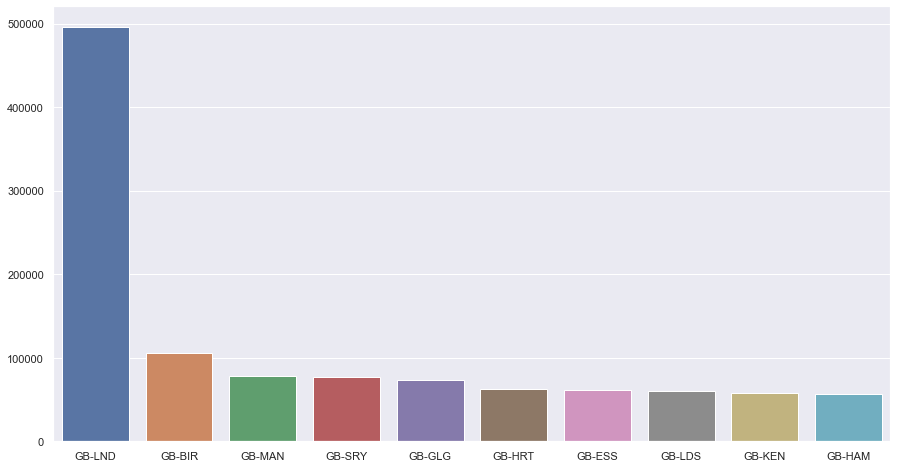

In [176]:
# streams by region
sns.barplot(df.region_code.value_counts().head(10).index, df.region_code.value_counts().head(10).values)


In [172]:
# top 5 most popular playlist
df["playlist_name"].value_counts().head(5)

Hot Hits UK                   193654
Today's Top Hits              105383
Topsify UK Top 40              54982
Freshness: Hot House Music     32961
The Pop List                   28630
Name: playlist_name, dtype: int64

In [7]:
# create new column showing age 
df["age"] = data["year"] - data["birth_year"]

/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


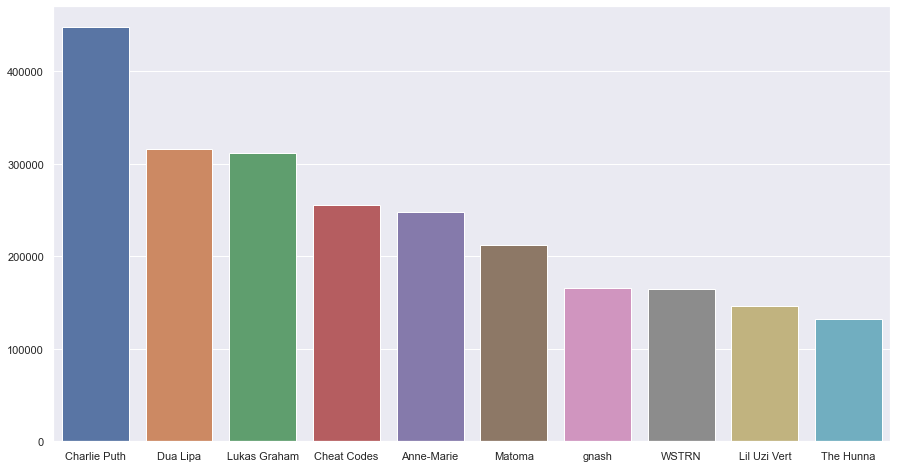

In [8]:
# top 10 most streamed artists from '15-'17 in GB
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(df["artist_name"].value_counts().head(10).index, df["artist_name"].value_counts().head(10).values)
plt.show()

/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


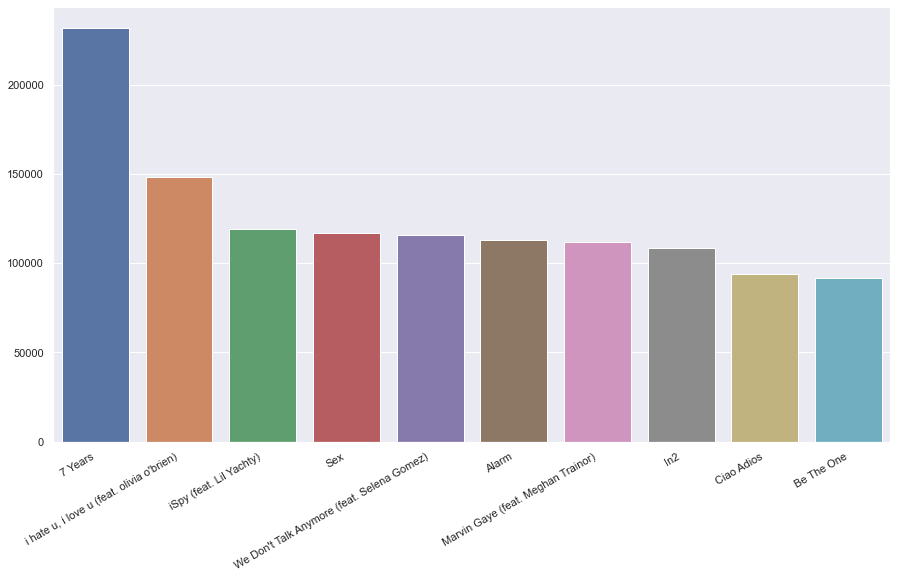

In [9]:
# top 10 most streamed tracks
top_10_tracks = sns.barplot(df["track_name"].value_counts().head(10).index, df["track_name"].value_counts().head(10).values)
top_10_tracks.set_xticklabels(top_10_tracks.get_xticklabels(), rotation = 30, ha="right")
plt.show()

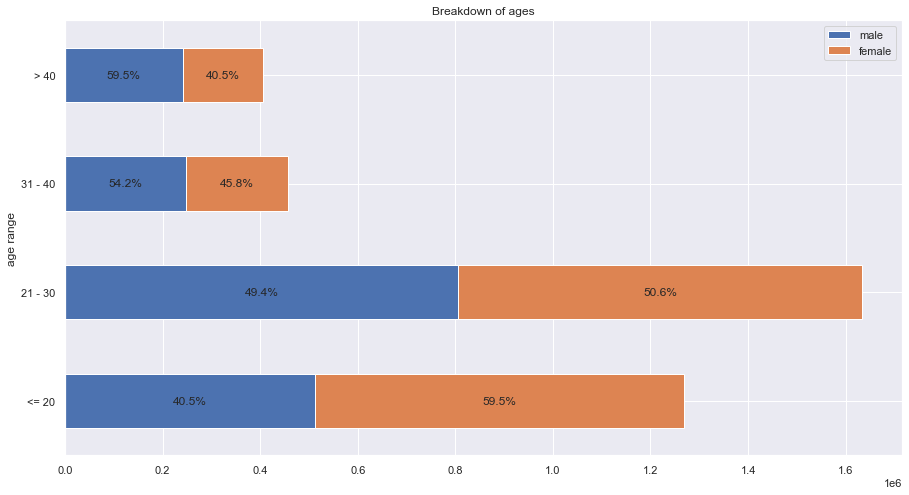

In [10]:
# observe how age affects getting a stroke 

male_age1 = len(df[(df['age'] <= 20) & (df['gender'] == "male")])
male_age2 = len(df[(df['age'].between(21,30)) & (df['gender'] == "male")])
male_age3 = len(df[(df['age'].between(31,40)) & (df['gender'] == "male")])
male_age4 = len(df[(df['age'] > 40) & (df['gender'] == "male")])

female_age1 = len(df[(df['age'] <= 20) & (df['gender'] == "female")])
female_age2 = len(df[(df['age'].between(21,30)) & (df['gender'] == "female")])
female_age3 = len(df[(df['age'].between(31,40)) & (df['gender'] == "female")])
female_age4 = len(df[(df['age'] > 40) & (df['gender'] == "female")])


age_range = ['<= 20', '21 - 30', '31 - 40', '> 40']
male = [male_age1, male_age2, male_age3, male_age4]
female = [female_age1, female_age2, female_age3, female_age4]

df_age = {'male':male, 'female': female}
df_age = pd.DataFrame(df_age, index = age_range)
df_age.reset_index(inplace = True)
df_age.rename(columns = {"index" : "age range"}, inplace = True)
   
df_age.plot(x= "age range", kind='barh', stacked=True, title='Breakdown of ages', mark_right=True)   

df_age_total = df_age["male"] + df_age["female"]
df_rel = df_age[df_age.columns[1:]].div(df_age_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_age.iloc[:, 1:].cumsum(1)[n], 
                                         df_age[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

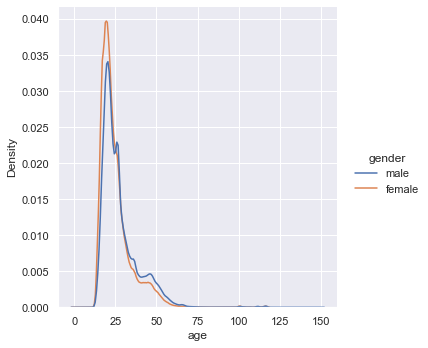

In [181]:
# plot age distribution by gender 
sns.displot(df, x="age", hue="gender", kind="kde", bw_adjust=1)

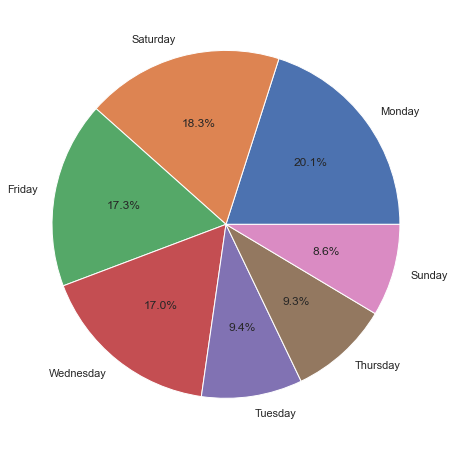

In [11]:
# customer listening behaviour by day
df_pie = pd.DataFrame(df["weekday_name"].value_counts())
df_pie.reset_index(inplace = True)

plt.pie(df_pie["weekday_name"], labels = df_pie["index"], autopct='%1.1f%%')
plt.show()

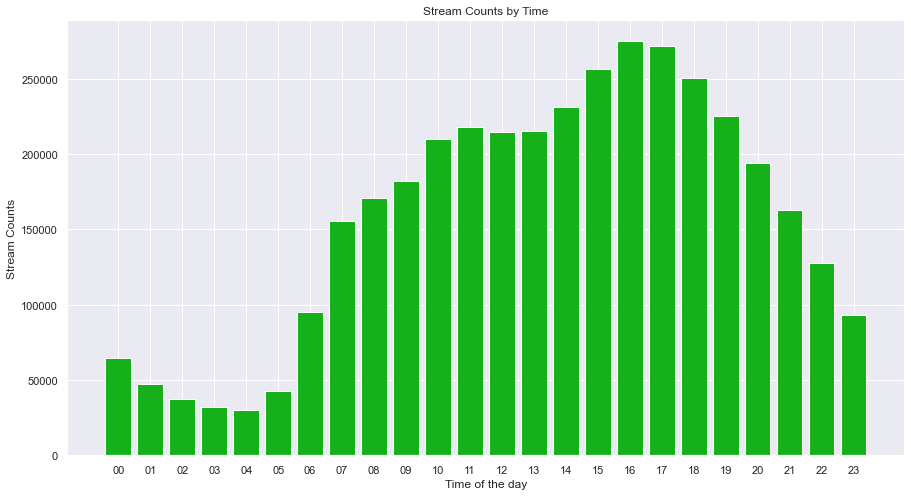

In [39]:
#seperate the time from date
df[['listen_date', 'listen_time']] = df["log_time"].str.split("T", expand = True)
#drop the date column
df = df.drop('listen_date', axis=1)
#get number of streams in an hour period
time = ['00',"01", "02",'03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
stream_counts=[]
for i in time:
    x = len(df.loc[df['listen_time'].str.startswith(i)])
    stream_counts.append(x)

#plot the streams count by different time periods of the day and the proportion of streams from 4 hit lists
xpos = np.arange(len(time))


plt.rcParams["figure.figsize"] = (15, 8)
plt.xticks(xpos, time)
plt.ylabel('Stream Counts')
plt.xlabel('Time of the day')
plt.title('Stream Counts by Time')
plt.bar(xpos, stream_counts, color = '#15B01A')
plt.show()

**Create Dependent Variable**

<div class="alert alert-warning">
<b>ACTION: Dependant variable </b> 

<p> Set up the problem as one of classification, selecting the relevant playlists as the variable we are trying to model.</p>

<p> Write useful helper functions to support creating of the feature vector and target vector </p>


</div>

In [12]:
# 4 key Playlists
key_playlist = ["Hot Hits UK", "Massive Dance Hits", "The Indie List", "New Music Friday"]

# select relevant playlists 

df_relevant = data[data["playlist_name"].isin(key_playlist)]

# Define Dependent Variable

# def get_successful_artists(data):
def get_successful_artists(data):
    df_relevant = data[data["playlist_name"].isin(key_playlist)]
    success_artist = list(df_relevant["artist_name"].unique())
    return success_artist

# def get_successful_before_2017(data):
def get_successful_before_2017(data):
    df_relevant = data[data["playlist_name"].isin(key_playlist)]
    success_before_2017_df = df_relevant[df_relevant["year"].isin([2014, 2015, 2016])]
    return list(success_before_2017_df["artist_name"].unique())

Now that we have created our dependent variable – whether an artist is successful or not, we can look at generating a set of features, based on the columns within our dataset, that we think might best explain the reasons for this success. 

**FEATURE ENGINEERING**

There are a large number of factors that could have an impact on the success of an artist, such as the influence of a playlist, or the popularity of an artist in a certain geographical region. 

To build a predictive model for this problem, we first need to turn these (largely qualitative) factors into measurable quantities. Characteristics like ‘influence’ and ‘popularity’ need to be quantified and standardized for all artists, to allow for a fair comparison. 

The accurateness of these numerical estimates will be the fundamental driver of success for any model we build. 
There are many approaches one might take to generate features. Based on the data columns available to us, a sensible approach is to divide our feature set into three groups:

1.	Artist Features
2.	Playlist Features
3.	User-base features


## Artist features

*	Stream count
*	Total Number of users
*	Passion Score 

The metric passion score is a metric suggested to us by Warner business analysts. 

It is defined as the number of stream divided by the total number of users. 

Warner analysts believe that repeated listens by a user is a far more indicative future success that simply total number of listens or total unique users. By including this in your model, we can evaluate whether this metric in fact might be of any significance.

<div class="alert alert-warning">
<b>ACTION: Artist features </b> 

<p> Write useful functions to create these new features. </p>


</div>

In [13]:
# unique artist in dataset
artist = data["artist_name"].unique()

In [14]:
# Stream count per artist
def stream_count(data):
    result = []
    for i in artist:
        count = data[data["artist_name"] == i]["artist_name"].count()
        result.append(count)     
    return result

In [15]:
# Number of users per artist
def user_count(data):
    result = []
    for i in artist: 
        subset = data[data["artist_name"] == i]
        count = len(subset["customer_id"].unique())
        result.append(count)
    return result

In [16]:
# Passion Score
def passion_score(data):
    result = [i / j for i, j in zip(stream_count(data), user_count(data))]
    return result

## Playlist Features

Understanding an artist’s growth as a function of his/her movement across different playlists is potentially key to understanding how to identify and breakout new artists on Spotify. 

In turn, this could help us identify the most influential playlists and the reasons for their influence.

One way to model the effect of playlists on an artist’s performance has been to include them as categorical features in our model, to note if there are any particular playlists or combinations of playlists that are responsible for propelling an artist to future success:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*
**
Success (1) = Artist Features on Key Playlist
Failure (0) = Artist Not Featured on Key Playlist
**

Where,

**
⇒Artist Feature N = Prior Playlist 1 + Prior Playlist 2 +…Prior Playlist N
**


Given that we have over 19,000 playlists in our dataset or 600 artists, using the playlists each artist has featured on, as categorical variables would lead to too many features and a very large, sparse matrix. 

Instead, we need to think of ways to summarize the impact of these playlists. One way to do this would be to consider the top 20 playlists each artist has featured on. 

Even better would be to come up with one metric that captures the net effect of all top 20 prior playlists, for each artist, rather including using all 20 playlists for each artists as binary variables. The intuition here is that if this metric as a whole has an influence on the performance of an artist, it would suggest that rather than the individual playlists themselves, it is a combination of their generalized features that affects the future performance of an artist. 

Accordingly, different combinations of playlists could equate to having the same impact on an artist, thereby allowing us to identify undervalued playlists.

Some of the features such a metric could use is the number of unique users or ‘reach’, number of stream counts, and the passion score of each playlist

* Prior Playlist Stream Counts
* Prior Playlist Unique Users (Reach)
* Prior Playlist Passion Score

There are several other such features that you could generate to better capture the general characteristics of playlists, such as the average lift in stream counts and users they generate for artists that have featured on them. 

The code to calculate these metrics is provided below:

<div class="alert alert-warning">
<b>ACTION: Playlist features </b> 

<p> Write useful functions to create new playlist features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest, work in your group to think about what other features might be useful and whether you can calculate them with the data you have </p>

</div>

In [17]:
# average streams for artists in their prior 20 playlists
def playlist_avg_stream_counts(data):
    result = []
    for i in artist:
        subset = data[(data["artist_name"] == i) & (~data["playlist_name"].isin(key_playlist))]
        stream_prior20 = subset.groupby('playlist_name')['log_time'].count().nlargest(n=20).sum()
        result.append(stream_prior20 / 20)
    return result


# average users for artists in their prior 20 playlists 
def playlist_avg_number_of_users(data):
    result = []
    for i in artist: 
        subset = data[(data["artist_name"] == i) & (~data["playlist_name"].isin(key_playlist))]
        prior20 = subset.groupby('playlist_name')["log_time"].count().nlargest(n=20)
        users = 0
        for x in prior20.index:
            users += subset.loc[subset["playlist_name"] == x]["customer_id"].nunique()
        result.append(users / 20)
    return result
            
        
# passion score for prior playlist
def playlist_avg_passion_score(data):
    result = [i / j for i, j in zip(playlist_avg_stream_counts(data), playlist_avg_number_of_users(data))]
    return result



## User-base features

We can use the age and gender columns to create an audience profile per artist.
*	Gender Percentage Breakdown
*	Age vector quantization 


<div class="alert alert-warning">
<b>ACTION: User features </b> 

<p> Write useful functions to create new user features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

In [18]:
# Gender breakdown

def gender_percentages(data):
    result = []
    for i in artist:
        subset = data[data["artist_name"] == i]
        male = subset.loc[subset["gender"] == "male"]
        result.append(len(male) / len(subset))
    return result


In [19]:
# Age breakdown

def age_percentages(data):
    age_list = []
    for i in artist:
        artist_data = data[data['artist_name']== i]
        artist_data = artist_data.drop_duplicates(subset = ['customer_id'])
        bins = [0, 18, 25, 50, 100]
        group_names = ['Dependent', 'YoungAdult', 'Adult', 'Senior']
        categories = pd.cut(artist_data['age'], bins, labels=group_names)
        x = {y:x/categories.value_counts().sum() for x,y in zip(categories.value_counts(),categories.value_counts().keys())} 
        age_list.append(x)
    
    df_age = pd.DataFrame(age_list, index = artist)
    return df_age

**Principle Component Analysis**

The data also contains a partial region code of the listener. We might want to consider including the regional breakdown of streams per artist as a feature of our model, to know if streams for certain regions are particularly influential on the future performance of an artist. 

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets. 

This is however beyond the scope of this courswork. Instead, a better way to summarize the impact of regional variation in streams is to use dimensionality reduction techniques. Here we will use Principle Component Analysis (PCA) to capture the regional variation in stream count.

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. Use **`scikit-learn`**’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

For a comprehensive understanding of how sklearn's PCA module works, please refer to the sklearn documentation. We will using 10 components of PCA in our model.

*Note: We could also apply a similar method to condense variation in stream across the 19,600 different playlists in our dataset.*

<div class="alert alert-warning">
<b>ACTION: PCA features </b> 

<p> Write useful functions to create new user feature based on regions data. </p>

<p> Are there other sensible features you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

In [20]:
# PCA ANALYSIS

def generate_pca(df,row_col, component_col, pca_n_comp=10, orig_comp_head = 1000):


    # Split DF to deal with memory issues (break up df and process)

    def dropna_splitdf(df,split_size):
        split_df = np.array_split(df, split_size)
        for i in split_df:
            i = i.dropna(subset=[component_col])
        return pd.concat(split_df)


    split_df = True
    if split_df:
        df = dropna_splitdf(df,4)
    else:
        df = df.dropna(subset=[component_col])
        
    subset = df[df[component_col].isin(df[component_col].value_counts().head(orig_comp_head).index)]
    pca_df = subset.groupby([row_col,component_col]).size().unstack(fill_value=0)
    playlist_component_names = pca_df.columns

    # Scale data before_PCA
    from sklearn.preprocessing import scale
    pca_df_scaled = pd.DataFrame(scale(pca_df))
    
    X = pca_df_scaled
    
    #conduct PCA
    from sklearn import decomposition
    pca = decomposition.PCA()
    pca.fit(X)
    decomposition.PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)
    pca.n_components = pca_n_comp
    
    X_reduced = pca.fit_transform(X)
    
    var_exp_cumsum = pca.explained_variance_ratio_.cumsum()
    var_exp_ratio = pca.explained_variance_ratio_
    var_exp = pca.explained_variance_
    mean = pca.mean_
    components =pca.components_
   

    pca_final = pd.DataFrame(X_reduced)
    pca_final.index = pca_df.index
    pca_columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"]
    pca_final.columns = pca_columns
    
    return pca_final

# output
pca_output = generate_pca(df, "artist_name", "region_code")

<div class="alert alert-danger">
<b>WARNING: PCA features </b> 
    
<p>If you struggle to complete this section successfully <b>please email me</b> and we will provide code to compute the new features. This will help with performance of the classifier in the next stage.</p>
</div>

Check the PCA feature table to make sure the dataframe looks as expected. Comment on anything the looks important. 

In [21]:
# PCA feature table
pca_output.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
artist_name,,,,,,,,,,
#90s Update,-2.996537,0.133219,-0.222020,-0.000687,0.134310,-0.073294,-0.207352,-0.003388,0.021987,-0.005801
17 Memphis,-2.995259,0.133363,-0.223186,-0.001360,0.133395,-0.074303,-0.207982,-0.003143,0.020686,-0.006841
2D,-3.001679,0.133770,-0.220709,-0.000315,0.135594,-0.074014,-0.207293,-0.003524,0.022019,-0.006043
3JS,-2.999616,0.133297,-0.221554,-0.000377,0.135204,-0.074663,-0.207142,-0.003532,0.021818,-0.006187
99 Percent,-2.421869,0.069814,-0.449367,-0.085404,0.003791,-0.060368,-0.240970,0.031882,-0.039502,-0.039597


<div class="alert alert-warning">
<b>ACTION: PCA plot </b> 

<p> Use a figure to show which components of PCA explain the majority of variation in the data. Accordingly, use only those components in your further analysis.</p>

</div>

**Data transformation**

The final step is to decide whether or not to normalize/transform any of the features. 

We should normalize data if we are more interested in the relative rather than absolute differences between variables. Given that all the numerical features in our dataset (centrality, lift, influence, gender breakdown, age breakdown) were meaningful, i.e. distances did make a difference;

<div class="alert alert-warning">
<b>ACTION: Feature transformation </b> 

<p> Comment on whether transforming particular features (influence, gender breakdown, age breakdown) is useful. Calculate the transformation where necessary.</p>

</div>


Now we can combine all of our features that we generated above, into a dataframe that can be processed by a machine learning algorithm:

In [22]:
# create final dataframe with artist features

attributes = ["stream_count", "user_count", "passion_score", "playlist_stream", "playlist_users", "playlist_passion", "gender_perc"]
final_df = pd.DataFrame(list(zip(stream_count(df),user_count(df),passion_score(df),
                                 playlist_avg_stream_counts(df), playlist_avg_number_of_users(df),
                                 playlist_avg_number_of_users(df),gender_percentages(df))),
                        index = artist,
                        columns = attributes)

final_df

,stream_count,user_count,passion_score,playlist_stream,playlist_users,playlist_passion,gender_perc
Sturgill Simpson,4898,4161,1.177121,90.25,86.60,86.60,0.651695
Delafe,32,25,1.280000,0.00,0.00,0.00,0.250000
Willy William,1916,1607,1.192284,9.40,9.10,9.10,0.519833
Benjamin Beilman,74,46,1.608696,0.00,0.00,0.00,0.635135
Topic,4953,4682,1.057881,117.70,115.10,115.10,0.555825
...,...,...,...,...,...,...,...
Will Joseph Cook,15322,12585,1.217481,223.55,217.75,217.75,0.458622
WSTRN,164885,144711,1.139409,926.05,887.50,887.50,0.467362
YONAKA,340,336,1.011905,9.50,9.50,9.50,0.647059
Zak Abel,26966,23417,1.151557,337.70,332.15,332.15,0.464474


In [23]:
#concat final dataframe with age percentage and PCA features
age_perc_df = age_percentages(df)

final_df = pd.concat([final_df, age_perc_df], axis = 1)
final_df = pd.concat([final_df, pca_output], axis = 1)

<ipython-input-19-48bf720d4075>:11: RuntimeWarning: invalid value encountered in long_scalars
  x = {y:x/categories.value_counts().sum() for x,y in zip(categories.value_counts(),categories.value_counts().keys())}


<div class="alert alert-warning">
<b>ACTION: Feature transformation </b> 

<p> Comment on whether transforming particular features (influence, gender breakdown, age breakdown) is useful. Calculate the transformation where necessary.</p>

</div>

**Preprocessing**

Before we can run any models on our dataset, we must make sure it is prepared and cleaned to avoid errors in results. This stage is generally refered to as preprocessing.

To begin with, we need to deal with missing data in the dataframe - the ML algorithm will not be able to process NaN or missing values. 

For this study, we will be imputing missing numerical values, and filling any one which we were not able to imput, with 0.

<div class="alert alert-warning">
<b>ACTION: Missing values </b> 

<p> Use the <b>Imputer</b> class to alter your final Dataframe that contains your feature vector.</p>

</div>

In [24]:
# Handle missing values

# observe missing vaues
final_df.isna().sum()

#from sklearn.preprocessing import Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#imp = Imputer(missing_values='NaN', strategy='median', axis=0)

cleaned_data = imputer.fit_transform(final_df)

# create cleaned final_df

cleaned_final_df = pd.DataFrame(cleaned_data, index = final_df.index, columns = final_df.columns)

Next, we need to make sure that none of the variables going into the model are collinear, and if so, we need to remove those variables that are highly correlated.

<div class="alert alert-warning">
<b>ACTION: Multi-collinearity </b> 

<p> Check and deal with multi-collinearity in your feature set.</p>

</div>

<AxesSubplot:>

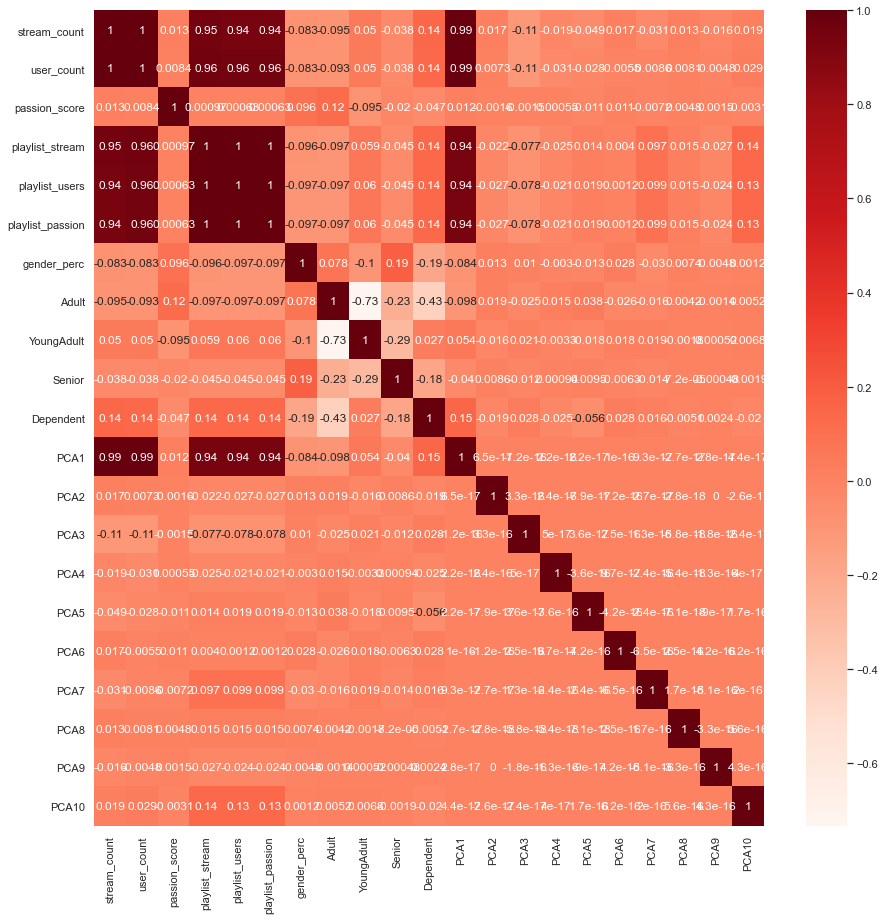

In [25]:
# Check for multicollinearity

import seaborn as sns

corr = final_df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cmap="Reds", annot=True)

In [26]:
# import relevant packages
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [27]:
# calculate the Variance Inflation Factor (VIF) for each attribute
vif_df = pd.DataFrame()
vif_df["feature"] = cleaned_final_df.columns
vif_df["VIF"] = [vif(cleaned_final_df.values, i) for i in range(len(cleaned_final_df.columns))]
vif_df

/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,stream_count,6.789309e+02
1,user_count,2.633658e+02
2,passion_score,3.058245e+00
3,playlist_stream,2.103319e+04
4,playlist_users,inf
5,playlist_passion,inf
6,gender_perc,7.851475e+00
7,Adult,8.231320e+00
8,YoungAdult,5.475302e+00
9,Senior,1.724559e+00


In [28]:
# Remove one of highly correlated varibles (test removing other as well)

feature_set = cleaned_final_df.drop(labels = ["stream_count", "user_count", "playlist_users", "playlist_stream", "PCA1"], axis = 1)

In [29]:
# vif after removing variables 
vif_df = pd.DataFrame()
vif_df["feature"] = feature_set.columns
vif_df["VIF"] = [vif(feature_set.values, i) for i in range(len(feature_set.columns))]
vif_df

,feature,VIF
0,passion_score,3.046766
1,playlist_passion,1.118300
2,gender_perc,7.826774
3,Adult,4.534283
4,YoungAdult,3.141415
5,Senior,1.433171
6,Dependent,1.504409
7,PCA2,1.001188
8,PCA3,1.008513
9,PCA4,1.001003


Finally, we want to take a look out the class balance in our dependent variable.

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. Based on our complete (unbalanced classes) training sample, if the model only predicted ‘failure’, we would achieve an accuracy of 88.8%. 

To give us a more even class balance, without losing too much data, we will sample data from the bigger class to achive a class balance closer to 60-40. 

There is another way to determine the accuracy of our predictions using a confusion matrix and ROC curve, but more on that later. For now, we will go ahead with sampling the bigger class:

<div class="alert alert-warning">
<b>ACTION: Class balance </b> 

<p> Calculate and comment on class balance.</p>

</div>

In [30]:
# create dependent variable
successful_artist = get_successful_artists(data)
feature_set["success"] = None

for i in feature_set.index:
    if i in successful_artist:
        feature_set.loc[i,"success"] = 1
    else:
        feature_set.loc[i,"success"] = 0
        
# Class Balance        
class_balance = feature_set.success.value_counts()[0] / feature_set.success.value_counts().sum()*100
print('Class Balance = ',class_balance)
print('nrow:',len(final_df.index))

Class Balance =  87.44326777609682
nrow: 661


In [31]:
# dataset after class rebalancing
from sklearn.model_selection import train_test_split

success_df = feature_set[feature_set["success"] == 1]
failure_df = feature_set[feature_set["success"] != 1]

failure_sampled_df, other_sampled_df = train_test_split(failure_df, train_size=125)

balanced_df = pd.concat([failure_sampled_df, success_df], axis = 0) 

# check class Balance        
class_balance = balanced_df.success.value_counts()[0] / balanced_df.success.value_counts().sum()*100
print('Class Balance = ',class_balance)
print('nrow:',len(balanced_df.index))


Class Balance =  60.09615384615385
nrow: 208


In [32]:
# export the dataframe as csv file
balanced_df.to_csv(r'Coursework Notebook/balanced_df.csv')

## 4.	Evaluate algorithms 

**Model Selection**

There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set



<div class="alert alert-warning">
<b>ACTION: Spot-check algorithms </b> 

<p> Try a mixture of algorithm representations (e.g. instances and trees). </p>

<p> Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).<p>

<p> Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).</p>

<p> Divide this work up among the different members of your team and then compare and comment on the performance of various approaches.</p>

</div>

In [4]:
#reset index
balanced_df = pd.read_csv('balanced_df.csv')

balanced_df = balanced_df.reset_index()

#check the data
balanced_df.head()

,index,Unnamed: 0,passion_score,playlist_passion,gender_perc,Adult,YoungAdult,Senior,Dependent,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,success
0,0,Jaider White,1.111111,0.25,0.000000,0.888889,0.111111,0.000000,0.000000,0.184109,-0.269174,0.149538,0.079515,-0.205543,-0.177612,0.079038,0.311869,-0.047215,0
1,1,Torro Torro,1.040650,4.10,0.838542,0.299728,0.460490,0.062670,0.177112,0.117663,-0.271139,-0.015111,0.100961,-0.067418,-0.221321,0.005723,0.013691,-0.014958,0
2,2,Locnville,1.232653,0.05,0.620861,0.274029,0.515337,0.022495,0.188139,0.112140,-0.244916,0.008023,0.105898,-0.073266,-0.224087,0.000629,0.019097,-0.010084,0
3,3,SLANG,1.067485,0.30,0.646552,0.314642,0.545171,0.009346,0.130841,-0.320087,-0.020120,-0.481102,0.590547,0.137137,0.612845,-0.701663,0.408811,0.500755,0
4,4,Shannon Noll,1.000000,0.05,0.562500,0.312500,0.437500,0.000000,0.250000,0.133428,-0.222202,-0.000908,0.134682,-0.074147,-0.207580,-0.003517,0.021564,-0.006409,0


In [65]:
# Split into train and validation set
features = ['passion_score','playlist_passion','gender_perc','Adult','YoungAdult','Senior','Dependent','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10']

X = balanced_df[features]
y = balanced_df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10086)


In [66]:
#check the number of rows in training set
len(X_train)

166

In [73]:
# change of dependent variable to integer for modelling
y_train = y_train.astype('int')

In [77]:
#model no.1: logistic regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_train_pred = cross_val_predict(model1, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_train, y_train_pred)))


Accuracy Score is 0.8494


/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [78]:
#model no.2: Linear SVC
model2 = LinearSVC()
model2.fit(X_train, y_train)

y_train_pred = cross_val_predict(model2, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy Score is 0.81928


/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

In [79]:
#model no.3: SVC
model3 = SVC()
model3.fit(X_train, y_train)

y_train_pred = cross_val_predict(model3, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy Score is 0.78313


In [80]:
#model no.4: decision tree model 
model4 =  DecisionTreeClassifier()
model4.fit(X_train, y_train)

y_train_pred = cross_val_predict(model4, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy Score is 0.8012


In [107]:
#model no.5: random forest model
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)

y_train_pred = cross_val_predict(model5, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_train, y_train_pred)))

Accuracy Score is 0.8494


In [83]:
#model no.6: deep neural network
model6 = keras.models.Sequential()
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model6.fit(X_train, y_train)

6/6 [==============================] - 0s 887us/step - loss: 1.5361 - accuracy: 0.8614


In [156]:
#Grid search for Random Forest


# Number of trees in random forest
n_estimators = [5,10,15,20]
# Number of features to consider at every split
max_features = [2,3,4]
# Maximum number of levels in tree
max_depth = [3,4,5]
# Minimum number of samples required to split a node
min_samples_split = [1,2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

#defining the parameters for the grid search
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#define the model and the grid search
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, scoring = "f1", cv = 3, verbose=2, n_jobs = 4)

#perform the grid search
rf_Grid.fit(X_train, y_train)

#finding the best hyperparamters combinations from grid search
rf_Grid.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/Users/brennanyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.7144152  0.76780142
 0.78948631 0.80722222 0.79056911 0.76581939 0.76288288 0.81699346
        nan        nan        nan        nan 0.75591017 0.82092024
 0.79154995 0.80112466 0.79349593 0.79653846 0.81479798 0.79974359
        nan        nan        nan        nan 0.73840049 0.79047916
 0.77124183 0.79408748 0.77941843 0.77426092 0.77037634 0.76695694
        nan        nan        nan        nan 0.80154509 0.79087107
 0.79463364 0.80860713 0.78249644 0.78509437 0.75294508 0.81065862
        nan        nan        nan        nan 0.76379305 0.80528424
 0.79078683 0.80722222 0.78950292 0.79105463 0.80390244 0.80252486
        nan        nan        nan        nan 0.78689307 0.78148414
 0.78543245 0.80610277 0.7868873  0.78024388 0.76976952 0.79479449
        nan        nan        nan   

RandomForestClassifier(max_depth=3, max_features=4, min_samples_leaf=2,
                       n_estimators=20)

In [157]:
#predict values with optimized hyperparameters

y_predict = rf_Grid.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))

Accuracy Score is 0.95238



## 5. Present Results

### Confusion Matrix

To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve. 


A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm. 

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

<div class="alert alert-warning">
<b>ACTION:  Confusion matrix  </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain confusion matrix results, calculate accuracy and precision etc. </p>

</div>

In [158]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_predict)
cf_matrix

array([[26,  2],
       [ 0, 14]])

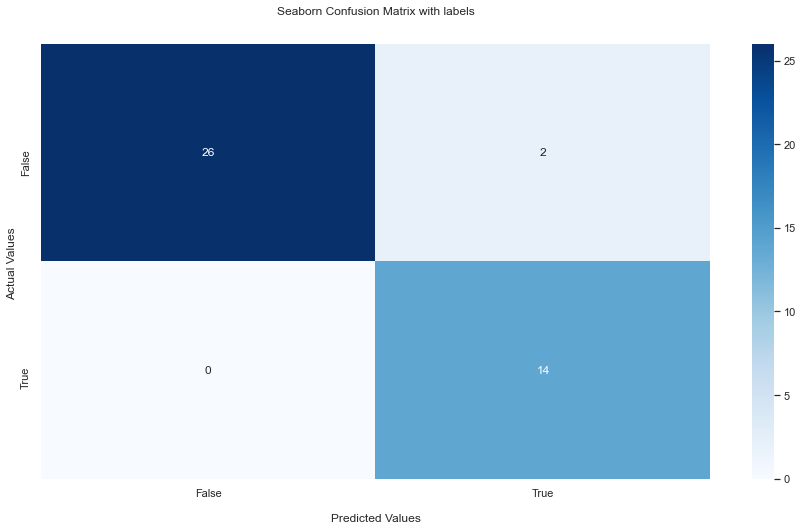

In [159]:
# Plot Confusion Matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### ROC Curve 

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold. 

The AUC summarizes the results of an ROC – it is the probability that a randomly chosen ‘success’ example has a higher probability of being a success than a randomly chosen ‘failure’ example. A random classification would yield an AUC of 0.5, and a perfectly accurate one would yield 1.


<div class="alert alert-warning">
<b>ACTION:  ROC Curve </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the ROC results. </p>

</div>

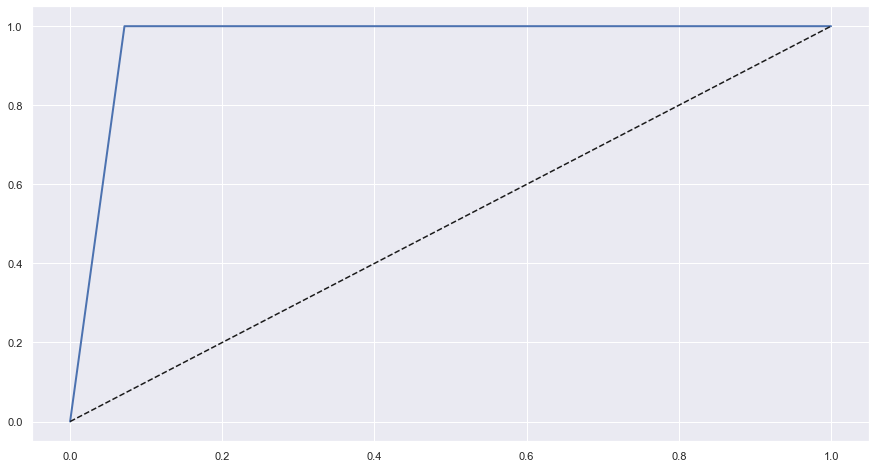

In [160]:
# # ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# Plot classifier ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    [...]
plot_roc_curve(fpr, tpr)
plt.show()

Now that you have a validated model, we can potentially analyze the features of the model, to understand which ones have had the most impact on predicting an artist’s success. 

To do this, we can plot the feature importance as determined by the classifier:

<div class="alert alert-warning">
<b>ACTION:  Feature importance</b> 

<p> Where possible, comment on the feature selection and performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the sensitivity of your final analysis. </p>

</div>

In [161]:
# Feature importance analysis 
important_features = {feature:importance for feature,importance in zip(features, model.feature_importances_)}
important_features = sorted(important_features.items(),key = lambda x: x[1],  reverse=True)
important_features

[('Senior', 0.16774089900716496),
 ('playlist_passion', 0.1233168009071915),
 ('Dependent', 0.10986768448241349),
 ('PCA5', 0.10272107071491636),
 ('PCA10', 0.08752859719723316),
 ('PCA6', 0.07830881996582786),
 ('PCA2', 0.07280477178685067),
 ('PCA3', 0.0656836486791636),
 ('PCA9', 0.061964556038970345),
 ('PCA4', 0.03811904229197764),
 ('PCA8', 0.02100234136521978),
 ('PCA7', 0.02067128145343187),
 ('YoungAdult', 0.015304879300915428),
 ('passion_score', 0.013915235975729096),
 ('Adult', 0.013747242760521739),
 ('gender_perc', 0.007303128072472515)]

## Summary 

**Please provide summaries of the work completed and the outcomes of the analysis**




## Tips completing the coursework 

- **Faculty** - You are free to run the code on your local machine, but if training timings and memory become an issue then use Faculty to complete the coursework. Technical support for using Faculty will be provided as necessary. 

- **Fast First Pass** - Make a first-pass through the project steps as fast as possible. This will give you confidence that you have all the parts that you need and a baseline from which to improve.


- **Attempt Every Step** -  It is easy to skip steps, especially if you are not confident or familiar with the tasks of that step. Try and do something at each step in the process, even if it does not contribute to improved accuracy. You can always build upon it later. Don’t skip steps, just reduce their contribution.


- **Ratchet Accuracy** - The goal of the project is to achieve relatively good model performance (which ever metric you use to measure this) and give you confidence about the ML project structure and workflow. Every step contributes towards this goal. Treat changes that you make as experiments that increase accuracy as the golden path in the process and reorganize other steps around them. Performance is a ratchet that can only move in one direction (better, not worse).


- **Adapt As Needed** - Do not limit your analysis to the instructions provided in Guidelines cells, feel free to expand your analysis beyond them. 